## Notebook Purpose

Look at qualitative results of feat_map regularization using best configs determined in `20201121_results_fm_reqularizn_quant.ipynb`

## Observations

Even though fm performs better quantitatively, qualitatively fm sometimes will diminish and sometimes will augment artifacts. One is not clearly better.

### TODO: fix streaky horizontal artifacts in DD+

In [10]:
import os, sys
from os import listdir
from os.path import isfile, join
import numpy as np
import torch
import matplotlib.pyplot as plt

sys.path.append('/home/vanveen/ConvDecoder/')
from utils.data_io import load_h5
from utils.evaluate import calc_metrics
from utils.transform import fft_2d, ifft_2d, root_sum_squares, \
                            reshape_complex_vals_to_adj_channels, \
                            reshape_adj_channels_to_complex_vals, \
                            crop_center

In [73]:
def load_gt(file_id):
    _, ksp_orig = load_h5(file_id)
    ksp_orig = torch.from_numpy(ksp_orig)
    return crop_center(root_sum_squares(ifft_2d(ksp_orig)), DIM, DIM)

def norm_im(im):
    ''' normalize img to [0,1] range '''
    return (im - im.min()) * (1. / im.max())

def plot_list(arr_list, clim=None):
    
    NUM_COLS = len(arr_list)
    title_list = ['ground-truth', 'dc', 'fm', 'diff']
    
    fig = plt.figure(figsize=(20,20))
    
    for idx in range(NUM_COLS):
        ax = fig.add_subplot(1,NUM_COLS,idx+1)
        ax.imshow(arr_list[idx], cmap='gray', clim=clim)
        ax.set_title(title_list[idx], fontsize=20)
        ax.axis('off')

In [74]:
path_in = '/bmrNAS/people/dvv/out_fastmri/expmt_fm_loss/trials_best/'

file_id_list = ['1000273', '1000325', '1000464', \
                '1000537', '1000818', '1001140', '1001219', \
                '1001338', '1001598', '1001533', '1001798']

trial_id_fm = 'autybby9'
trial_id_00 = '0000_10k'

DIM = 320

In [76]:
img_gt.mean(), img_dc.mean(), img_fm.mean()

(tensor(1.9518e-05), 0.27611318, 0.27599823)

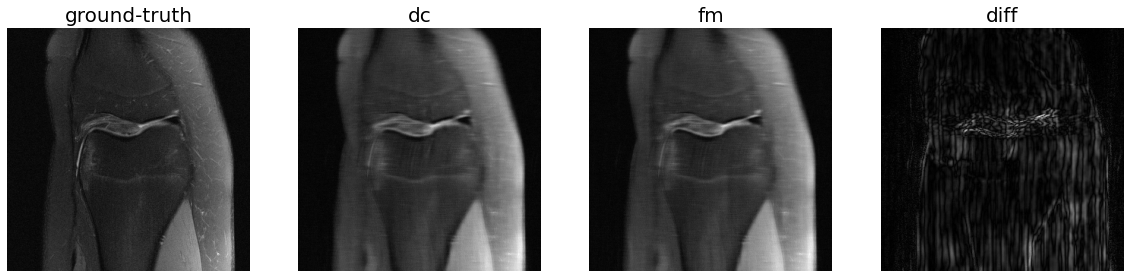

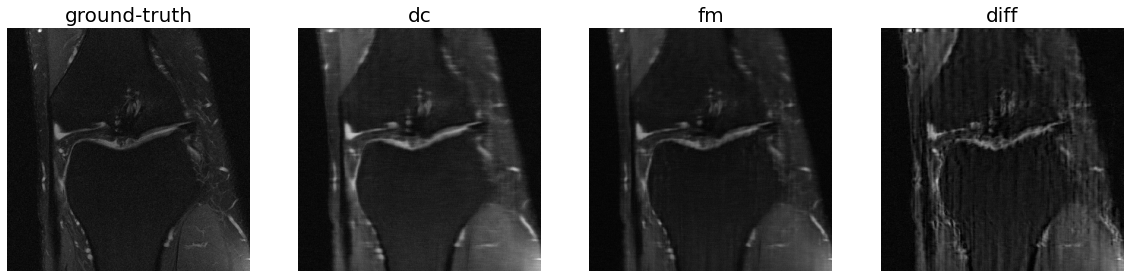

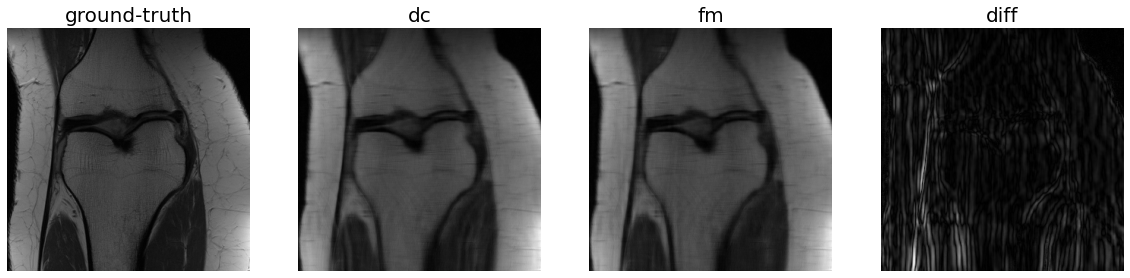

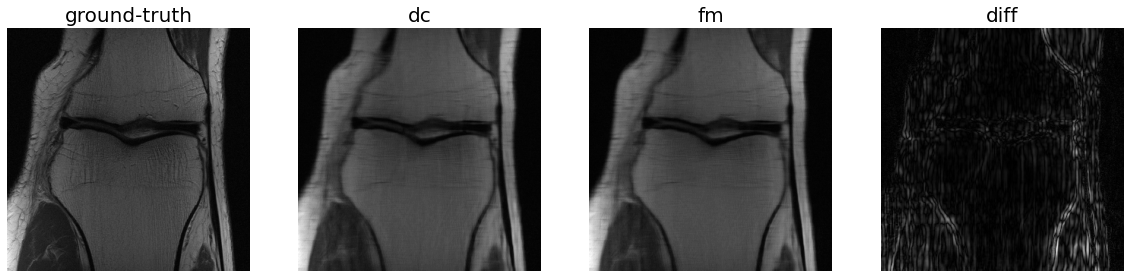

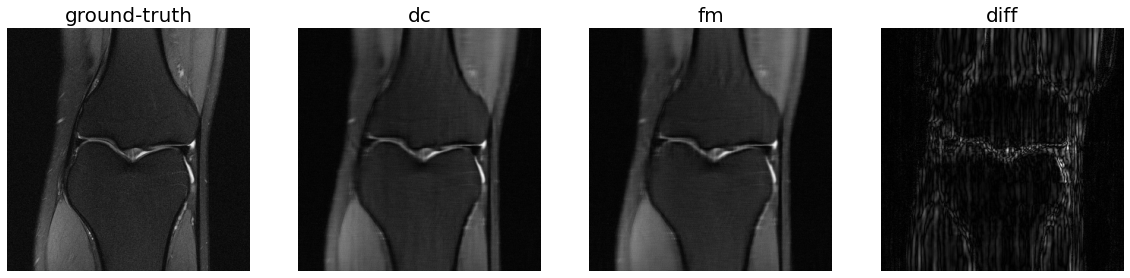

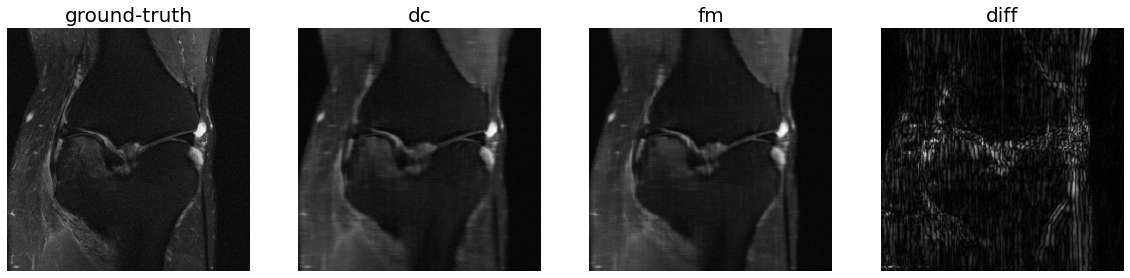

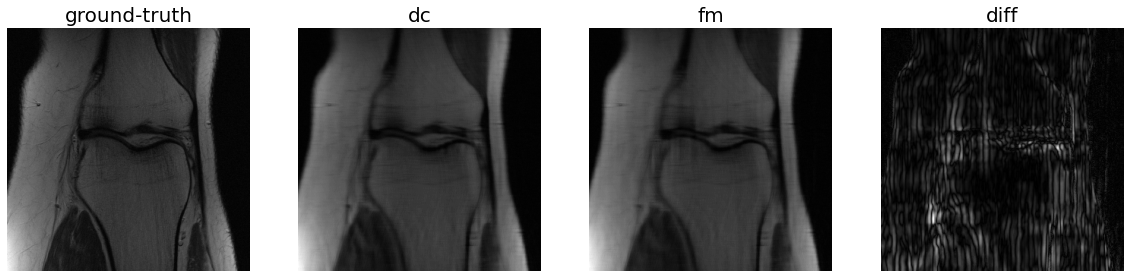

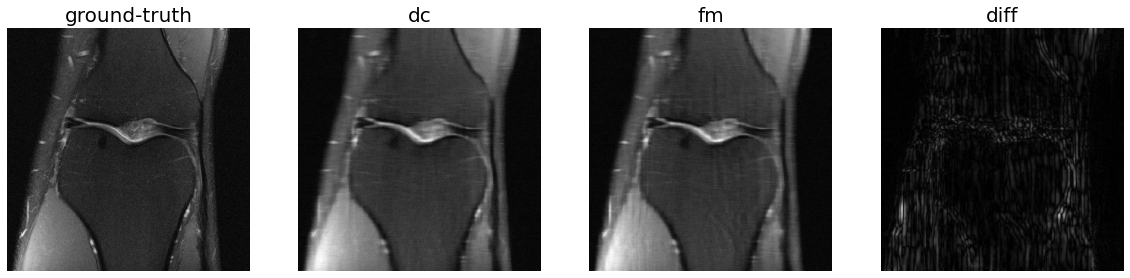

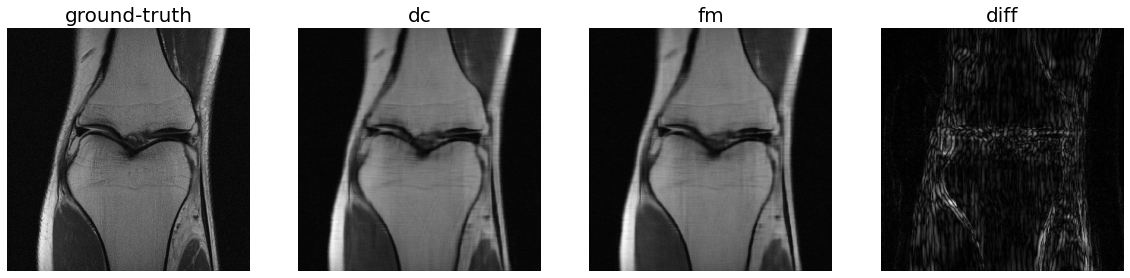

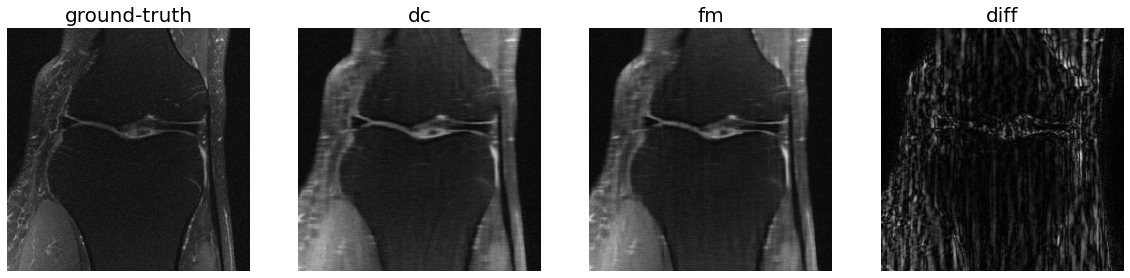

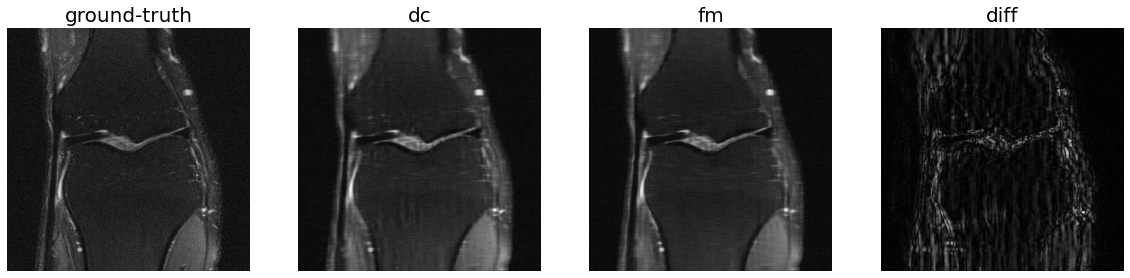

In [75]:
nf = len(file_id_list)
s_e_list, p_e_list, s_d_list, p_d_list = np.empty(nf), np.empty(nf), np.empty(nf), np.empty(nf)

for idx, file_id in enumerate(file_id_list):
    img_gt = load_gt(file_id)

    fn_samp = '{}_{}'.format(trial_id_00, file_id)
    img_est = np.load('{}{}_{}_est.npy'.format(path_in, trial_id_00, file_id))
    img_dc = np.load('{}{}_{}_dc.npy'.format(path_in, trial_id_00, file_id))
    img_fm = np.load('{}{}_{}_dc.npy'.format(path_in, trial_id_fm, file_id))

#     _, _, s_e_list[idx], p_e_list[idx] = calc_metrics(img_est, np.array(img_gt))
#     _, _, s_d_list[idx], p_d_list[idx] = calc_metrics(img_dc, np.array(img_gt))
    
    img_diff = np.abs(norm_im(img_fm) - norm_im(img_dc))
#     print(img_diff.max())
    
    plot_list([img_gt, img_dc, img_fm, img_diff])

# s_d_list.mean(), p_d_list.mean(), s_e_list.mean(), p_e_list.mean()